- Author: Sheryl Toh 
- Email: sheryl_toh_152@outlook.com

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# read in the files 
training_data = pd.read_csv("cs-training.csv")

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
#A brief understanding of the distribution of the different features 
training_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


###### Personal observations and assumptions :
1. SeriousDlqin2yrs  
    - Categorical (1/0) 
    - of which 1 is an indicator of a borrower's default based on assumption that 3months of due deliquency is a long period of time for a borrower to not pay off their loan and hence is of a high risk to continue not doing so. 
2. RevolvingUtilizationOfUnsecuredLines
    - Integer (%)
    - a higher percentage would indicate the borrower has high credit card spendings and utilise their line of credit greatly. 
    - seems like a good indicator of default 
3. Age
    - integer
    - borrowers are on the average of 52 years old, probably close to retirement or at the last stage of their career path 
    - has a min of 0 years old ??? Could be due to missing age in the bank form
4. NumberOfTime30-59DaysPastDueNotWorse
    - integer
    - Most borrowers do not fall under this category, with 75% quartile having 0 number of times they went 30-59 days past due 
5. DebtRatio
    - integer (%)
    - an indicator of whether the person is able to sustain his or her debt, alimony and living costs based on the monthly gross income 
    - higher is not a good sign 
6. MonthlyIncome
    - real
    - Average of $6000
    - with extremes 
7. NumberOfOpenCreditLinesAndLoans
    - integer
    - on the average, ~5
    - more would be potentially dangerous to be able to pay it off in time 
8. NumberOfTimes90DaysLate
    - integer
    - good indicator of risk of default 
9. NumberRealEstateLoansOrLines
    - integer 
    - average ~1 to 2
10. NumberOfTime60-89DaysPastDueNotWorse
    - integer
    - similar to column 4 (NumberOfTime30-59DaysPastDueNotWorse), except the duration is longer
11. NumberOfDependents
    - integer 
    - average 0 to 1 dependents 
    - more dependents could make it taxing on the borrower to pay off loans 

# EDA

In [6]:
training_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
training_data["SeriousDlqin2yrs"].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

#### Age

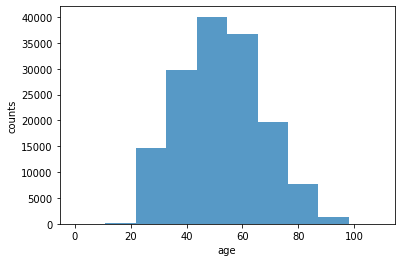

In [8]:
age_data_lst = training_data["age"].tolist()
min_age = min(age_data_lst)
max_age = max(age_data_lst)
plt.hist(age_data_lst,range = (min_age, max_age), alpha = 0.75)
plt.xlabel("age")
plt.ylabel("counts")
plt.show()

most of the customers lies within 40 to 60 years old 

#### Income

In [9]:
# Distribution of income for those non Na value

In [10]:
training_data_nona = training_data[~training_data["MonthlyIncome"].isna()]

In [11]:
max(training_data_nona["MonthlyIncome"].tolist())

3008750.0

(array([4.4280e+03, 6.4590e+03, 1.2439e+04, 1.4966e+04, 1.4810e+04,
        1.4038e+04, 1.1431e+04, 9.1200e+03, 7.4950e+03, 5.2980e+03,
        5.5780e+03, 2.9180e+03, 2.7170e+03, 1.6520e+03, 1.2110e+03,
        1.1790e+03, 8.2600e+02, 5.8600e+02, 5.0000e+02, 2.8900e+02,
        4.4000e+02, 1.9300e+02, 1.7100e+02, 1.2500e+02, 9.0000e+01,
        2.1000e+02, 6.9000e+01, 5.8000e+01, 5.9000e+01, 5.0000e+01,
        1.0200e+02, 3.9000e+01, 3.5000e+01, 4.8000e+01, 2.4000e+01,
        4.7000e+01, 1.5000e+01, 3.0000e+01, 1.3000e+01, 1.7000e+01,
        5.6000e+01, 2.5000e+01, 1.7000e+01, 1.3000e+01, 1.3000e+01,
        2.6000e+01, 5.0000e+00, 4.0000e+00, 8.0000e+00, 6.0000e+00,
        2.5000e+01, 5.0000e+00, 8.0000e+00, 1.0000e+01, 8.0000e+00,
        8.0000e+00, 5.0000e+00, 1.1000e+01, 1.0000e+01, 3.0000e+00,
        1.1000e+01, 4.0000e+00, 1.4000e+01, 4.0000e+00, 3.0000e+00,
        9.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+01, 4.0000e+00, 4.0000e+00, 5.00

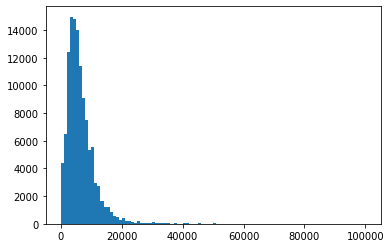

In [12]:
plt.hist(training_data_nona["MonthlyIncome"].tolist(),bins=100, range = (0,100000)) # not to use outliers 

In [13]:
max(training_data["MonthlyIncome"])

3008750.0

Right skewed: Most of the monthly incomes lie between 0 and 20,000 with few outliers beyond there up to the max of $3,008,750

###### separate the monthly income into the different quartiles and plot against y

In [14]:
quantile_range = training_data_nona["MonthlyIncome"].quantile(np.arange(4)/4)

In [15]:
quantile_range

0.00       0.0
0.25    3400.0
0.50    5400.0
0.75    8249.0
Name: MonthlyIncome, dtype: float64

In [16]:
training_data_nona["incomeQuantile"] = training_data_nona['MonthlyIncome'].apply(
    lambda x: quantile_range.index[np.searchsorted(quantile_range, x, side="right") - 1])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
qr_df = pd.DataFrame(training_data_nona.groupby(by = "incomeQuantile")["SeriousDlqin2yrs"].apply(list)).reset_index()

In [18]:
qr_df["qr_dlqCount"] = qr_df["SeriousDlqin2yrs"].apply(lambda x: len([i for i in x if i ==1]))
qr_df["qr_nodlqCount"] = qr_df["SeriousDlqin2yrs"].apply(lambda x: len([i for i in x if i ==0]))

In [19]:
qr_df

,incomeQuantile,SeriousDlqin2yrs,qr_dlqCount,qr_nodlqCount
0,0.00,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",2748,27119
1,0.25,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2381,27736
2,0.50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1837,28376
3,0.75,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1391,28681


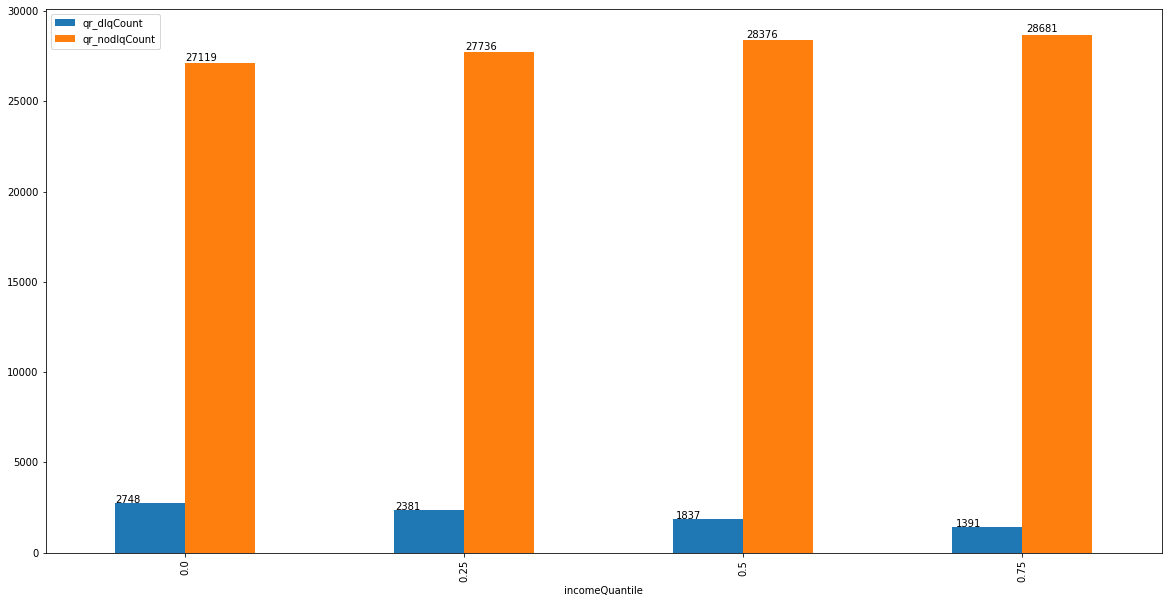

In [20]:
ax = qr_df.plot.bar(x = "incomeQuantile", y= ["qr_dlqCount", "qr_nodlqCount"] , figsize=(20,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [21]:
#calculate percentage
qr_df["percentage_deliquentCount"] = qr_df.apply(
    lambda x : round(100* x["qr_dlqCount"]/(x["qr_dlqCount"] + x["qr_nodlqCount"]),2), axis = 1)

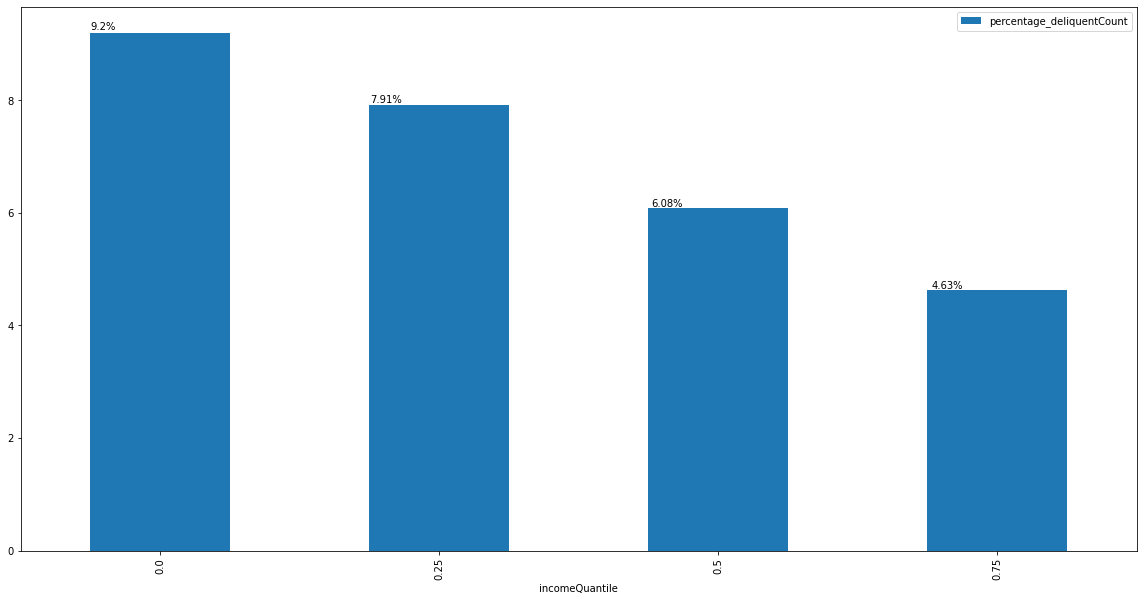

In [22]:
ax = qr_df.plot.bar(x= "incomeQuantile", y="percentage_deliquentCount", figsize=(20,10))
for p in ax.patches:
    ax.annotate("{}%".format(str(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

There is a higher percentage of borrowers within the lower quantile of monthly incomes ( below 50th percentile ) who is more likely to default

- lower income would mean higher instability to pay off any sudden huge loans , more likely to default 

#### Number of Dependents

In [23]:
# remove na value 
training_data_numDep_noNa = training_data[~training_data["NumberOfDependents"].isna()]

In [24]:
numDependentsCounts_df = pd.DataFrame(training_data_numDep_noNa["NumberOfDependents"].astype(int).value_counts()).reset_index()
numDependentsCounts_df.columns = ["Number of Dependents", "Counts"]
numDependentsCounts_df

,Number of Dependents,Counts
0,0,86902
1,1,26316
2,2,19522
3,3,9483
4,4,2862
5,5,746
6,6,158
7,7,51
8,8,24
9,10,5


Majority of the borrowers either have no dependents or 1 dependent with a few extremes of have > 10 dependents

In [25]:
training_data_numDep_noNa.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [26]:
num_dep_dlq_df = training_data_numDep_noNa.groupby("NumberOfDependents").agg({"SeriousDlqin2yrs": list}).reset_index()

In [27]:
num_dep_dlq_df["deliquentCount"] = num_dep_dlq_df["SeriousDlqin2yrs"].apply(lambda x: len([i for i in x if i ==1]))
num_dep_dlq_df["noDeliquentCount"] = num_dep_dlq_df["SeriousDlqin2yrs"].apply(lambda x: len([i for i in x if i ==0]))

In [28]:
num_dep_dlq_df

,NumberOfDependents,SeriousDlqin2yrs,deliquentCount,noDeliquentCount
0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5095,81807
1,1.0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1935,24381
2,2.0,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1584,17938
3,3.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",837,8646
4,4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",297,2565
5,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",68,678
6,6.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",24,134
7,7.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5,46
8,8.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,22
9,9.0,"[0, 0, 0, 0, 0]",0,5


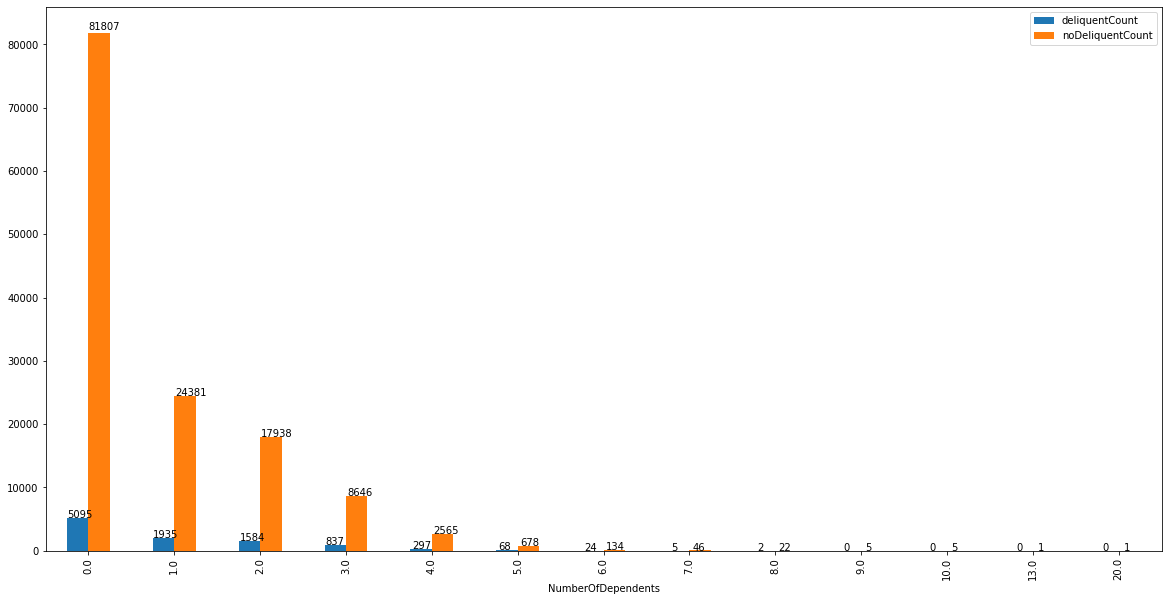

In [29]:
ax = num_dep_dlq_df.plot.bar(x = "NumberOfDependents", y= ["deliquentCount", "noDeliquentCount"] , figsize=(20,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [30]:
#calculate percentage
num_dep_dlq_df["percentage_deliquentCount"] = num_dep_dlq_df.apply(
    lambda x : round(100* x["deliquentCount"]/(x["deliquentCount"] + x["noDeliquentCount"]),2), axis = 1)

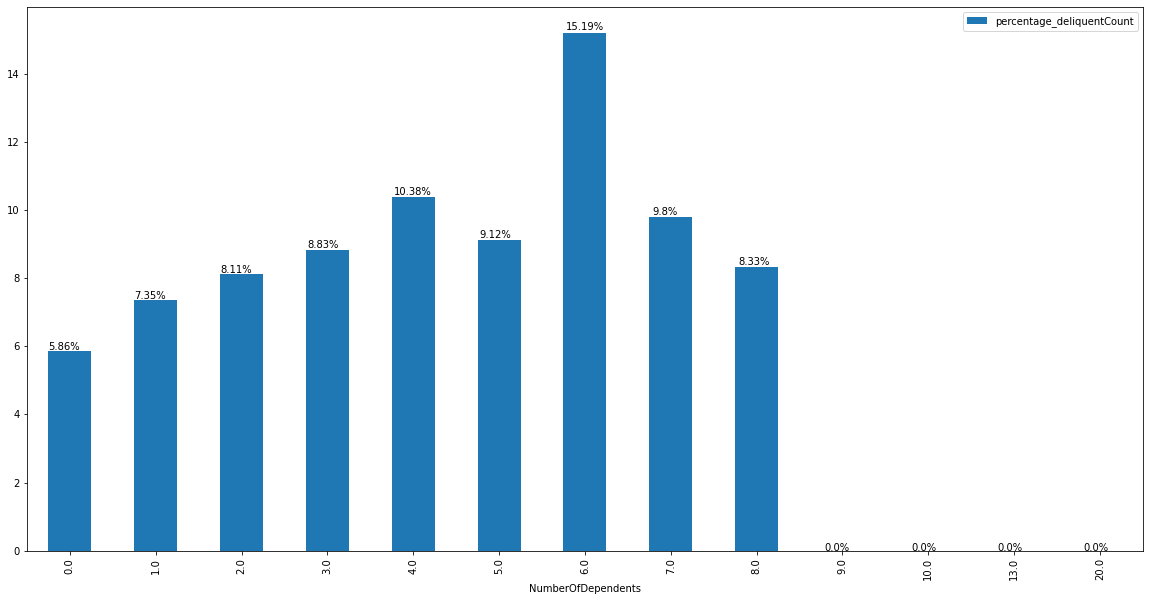

In [31]:
ax = num_dep_dlq_df.plot.bar(x= "NumberOfDependents", y="percentage_deliquentCount", figsize=(20,10))
for p in ax.patches:
    ax.annotate("{}%".format(str(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

Interesting to note that those with alot more dependents (>9) are less likely to default.

- most likely due to the small sample of borrowers in that group too and that those who default constitute a small percentage of the general population

A higher percentage of people who default has number of dependents at ~4-6. 
- Having more people to feed and pay bills for , could be a reason the borrower could not pay his loans on time 

##### Correlation Matrix

In [32]:
training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [33]:
corr_df = training_data[['SeriousDlqin2yrs',
           'RevolvingUtilizationOfUnsecuredLines', 'age',
           'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
           'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfDependents']].corr()

In [34]:
corr_df.style.background_gradient(cmap='coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


NumberOfTime60-89DaysPastDueNotWorse , NumberOfTime30-59DaysPastDueNotWorse,and NumberOfTimes90DaysLate are strongly correlated to each other.

- this make sense as they are based on number of times from just different amount of days. Hence it will overlap
- however since they represent the behaviour of the borrower 
    - to default either never, only for a short period or 
    - default after for long period 

Hence I did not remove them.

## Handling Na values under MonthlyIncome column ( likewise for NumberOfDependents column)
There are various ways to handle for missing data for this column (continuous)

1. Depending on the percentage of the missing rows out of the whole dataset, if it is not that significant, can remove 
    - however, this is removing potential significant data points and strongly not recommended
2. Fill in with the mean/median of that column since this is the training set, it would not introduce data leakage
    - choose mean or median based on the distribution
        - choose median such that it would not get affected by the outliers under this column
3. Using other columns to build a clustering method, create a borrower profile, and find which one it best belong to and using the mean of the income of this group ( median number of dependents for this group )
    - for a better representation instead of using the median/mean which is general across all types of borrowers 
    
    

- Method 2 is a quick and easy way to get things done in the initial POC stage, as well as in production because of one less model (clustering) to be built but could affect results of the model 
- Method 3 would be more comprehensive, but more considerations have to be taken during the deployment into ML pipelines such that it would not affect the speed or scalability. 

For this assignment I would try out both just to see any difference in the final results.


# Try 1
- using median to handle for missing monthly income and for number of dependent after splitting to training and testing dataset

As the testing data given do not have labels, take a subset of the training data to form the testing data for this assignment purpose

In [35]:
training_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [36]:
training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [37]:
X = training_data[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'
]]

y = training_data["SeriousDlqin2yrs"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [40]:
def apply_median_to_na(df, colname):
    """
    Apply median onto the given column's missing rows on the dataframe and return the new dataframe
    
    Params
    ------
    df : pandas dataframe
    colname : string, must be present in the df 
    
    Return
    ------
    dataframe with the nan value replaced median value 
    """
    df_copy = df.copy(deep=True)
    col_median = df_copy[colname].median()
    df_copy[colname] = df_copy[colname].fillna(col_median)
    return df_copy
    

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 92988 to 121958
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 1   age                                   112500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 3   DebtRatio                             112500 non-null  float64
 4   MonthlyIncome                         90223 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 6   NumberOfTimes90DaysLate               112500 non-null  int64  
 7   NumberRealEstateLoansOrLines          112500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 9   NumberOfDependents                    109562 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 9.4 MB


In [42]:
new_X_train = apply_median_to_na(X_train, "MonthlyIncome")
new_X_train = apply_median_to_na(new_X_train, "NumberOfDependents")
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 92988 to 121958
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 1   age                                   112500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 3   DebtRatio                             112500 non-null  float64
 4   MonthlyIncome                         112500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 6   NumberOfTimes90DaysLate               112500 non-null  int64  
 7   NumberRealEstateLoansOrLines          112500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 9   NumberOfDependents                    112500 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 9.4 MB


In [43]:
new_X_test = apply_median_to_na(X_test, "MonthlyIncome")
new_X_test = apply_median_to_na(new_X_test, "NumberOfDependents")
new_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 59770 to 40589
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 1   age                                   37500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 3   DebtRatio                             37500 non-null  float64
 4   MonthlyIncome                         37500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 6   NumberOfTimes90DaysLate               37500 non-null  int64  
 7   NumberRealEstateLoansOrLines          37500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 9   NumberOfDependents                    37500 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.1 MB


In [44]:
# converting to numpy array 
X_train_numpy = new_X_train.to_numpy()
y_train_numpy = y_train.to_numpy()

X_test_numpy = new_X_test.to_numpy()
y_test_numpy = y_test.to_numpy()

# Modelling

### XGBoost

In [45]:
from xgboost import XGBClassifier

In [46]:
# fit with default parameters 
xgb = XGBClassifier()
xgb.fit(X_train_numpy, y_train_numpy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_predict = xgb.predict(X_test_numpy)

In [48]:
confusion_matrix(y_test_numpy,y_predict)
# TN (0,0), FP(0,0)
# FN (1,0), TP (1,1)

array([[34622,   403],
       [ 1991,   484]])

In [49]:
target_names = ["no default", "default"]

In [50]:
print(classification_report(y_test_numpy,y_predict, target_names=target_names))

              precision    recall  f1-score   support

  no default       0.95      0.99      0.97     35025
     default       0.55      0.20      0.29      2475

    accuracy                           0.94     37500
   macro avg       0.75      0.59      0.63     37500
weighted avg       0.92      0.94      0.92     37500



Low recall score for predicting default ( high amount of False Negatives )

- this could be due to the imbalanced dataset ( number of borrowers who default constitutes of a smaller percentage of the general population. )
- Can be resolved by 
    1. Oversampling or SMOTE, to generate more data points for the minority calss
        - to learn more features of a default behaviour 
    2. Using classweight params if possible 
        - for model to understand that the percentage of the default will always be very low as normal borrowers would want to pay back their debt asap 


In [51]:
np.unique(y_train_numpy, return_counts= True)

(array([0, 1]), array([104949,   7551]))

In [52]:
scale_pos_weight = 104949 / 7551 # for using classweight in xgboost
scale_pos_weight

13.898688915375446

In [53]:
xgb_new = XGBClassifier(scale_pos_weight= scale_pos_weight) # using default params
xgb_new.fit(X_train_numpy, y_train_numpy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=13.898688915375446,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
y_predict = xgb_new.predict(X_test_numpy)

In [55]:
confusion_matrix(y_test_numpy,y_predict)
# TN (0,0), FP(0,0)
# FN (1,0), TP (1,1)

array([[29152,  5873],
       [  721,  1754]])

In [56]:
print(classification_report(y_test_numpy,y_predict, target_names=target_names))

              precision    recall  f1-score   support

  no default       0.98      0.83      0.90     35025
     default       0.23      0.71      0.35      2475

    accuracy                           0.82     37500
   macro avg       0.60      0.77      0.62     37500
weighted avg       0.93      0.82      0.86     37500



Recall score for default increase to >0.7 after taking the class weight into account.

### How i validate my model and why i choose such evaluation technique:
Reason as to why i choose Recall for Default class as my main evaluation metrics, is because in this situation of predicting the probability that someone will experience financial distress in the next 2 years ( or to default ), the main person who will benefit from this model are the banks, because they use it to gauge if the borrowers will return back the loan. They would have to balance between gaining interest from loans or the risk of the borrower defaulting on the loan. The latter would have a greater impact on the bank as the amount dealing here is alot more than the interest gains. Hence, the goal would be to reduce the number of False Negatives ( the actual label is Default but the model predicts it as no default ) so that the banks would get less borrowers who default on their loans and that would then increase the recall score, the main evaluation metrics to be used in banks' credit scoring algorithm.

Finally, as the goal of the competion is to build a model that borrowers can use to help make the best financial decisions, by having a model in the best interests of a bank for them to test out the different financial decisions could give them a better overview of their credit score ( leaning to low or high based on their risk of default ).


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# gridsearch 
grid = {"n_estimators": [10,50,100],
        "max_depth": [6,10,20],
        "learning_rate": [0.05,0.2,0.5,0.75]
       }

In [59]:
xgb_new = XGBClassifier(scale_pos_weight= scale_pos_weight)
xgb_cv = GridSearchCV(xgb_new, grid, cv = 5, scoring= "recall")

In [60]:
xgb_cv.fit(X_train_numpy, y_train_numpy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=13.898688915375446,
                                     subsample=None, tre

In [61]:
xgb_cv.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 10}

In [62]:
# using the model with the best parameters 
y_pred_cv = xgb_cv.best_estimator_.predict(X_test_numpy)

In [63]:
confusion_matrix(y_test_numpy,y_pred_cv)
# TN (0,0), FP(0,0)
# FN (1,0), TP (1,1)

array([[27826,  7199],
       [  562,  1913]])

In [64]:
print(classification_report(y_test_numpy,y_pred_cv, target_names=target_names))

              precision    recall  f1-score   support

  no default       0.98      0.79      0.88     35025
     default       0.21      0.77      0.33      2475

    accuracy                           0.79     37500
   macro avg       0.60      0.78      0.60     37500
weighted avg       0.93      0.79      0.84     37500



Using gridsearch to find the best parameters, it push up the recall score from 0.71 to 0.77.

In [65]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

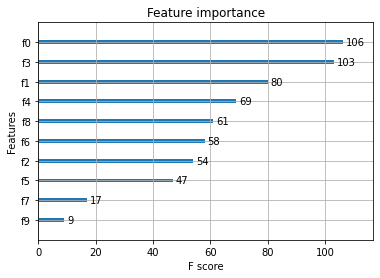

In [66]:
plot_importance(xgb_cv.best_estimator_) # feature importance 

In [67]:
dict(zip(list(X_train.columns), list(range(0,len(X_train)-1))))

{'RevolvingUtilizationOfUnsecuredLines': 0,
 'age': 1,
 'NumberOfTime30-59DaysPastDueNotWorse': 2,
 'DebtRatio': 3,
 'MonthlyIncome': 4,
 'NumberOfOpenCreditLinesAndLoans': 5,
 'NumberOfTimes90DaysLate': 6,
 'NumberRealEstateLoansOrLines': 7,
 'NumberOfTime60-89DaysPastDueNotWorse': 8,
 'NumberOfDependents': 9}

The top two significant features are : RevolvingUtilizationOfUnsecuredLines and DebtRatio

# Q: What is AUC? Why do you think AUC was used as the evaluation metric for such a problem? What are other metric you think would also be suitable for this competition

AUC stands for area under the curve , specifically for ROC curve that was plotted with TPR against FPR for every possible classification threshold. It tells you how much the model is capable of distinguishing between classes and it ranges from 0-1, with 1 indicating that the model is able to distinguish between the two classes perfectly while 0 means it is predicting wrongly(i.e the opposite class of its actual class) for all data points.

For this binary classification problem, it would have summarised the model performance across different thresholds, whereas other evaluation metric such as accuracy ( number of correct predictions / total number of inputs sample ) is based on a single threshold ( usually the default threshold: 0.5). 

For this competition that has a severe class imbalance problem, another evaluation metric that would be more suitable than ROC-AUC curve, will be using precision-recall curves since ROC AUC will paint an overly glorified result. 

The difference is illustrated below:


### ROC AUC 

In [68]:
from sklearn.metrics import roc_curve, auc


In [69]:
y_pred_proba = xgb_cv.best_estimator_.predict_proba(X_test_numpy)

In [70]:
y_pred_proba

array([[0.8619547 , 0.13804531],
       [0.83954835, 0.16045165],
       [0.8422673 , 0.15773271],
       ...,
       [0.32032162, 0.6796784 ],
       [0.61390775, 0.38609225],
       [0.82044756, 0.17955245]], dtype=float32)

In [71]:
y_pred_proba[:,1]

array([0.13804531, 0.16045165, 0.15773271, ..., 0.6796784 , 0.38609225,
       0.17955245], dtype=float32)

In [72]:
fpr, tpr, _ = roc_curve(y_test_numpy, y_pred_proba[:,1])

In [73]:
roc_auc = auc(fpr, tpr)

In [74]:
roc_auc

0.8596815031110535

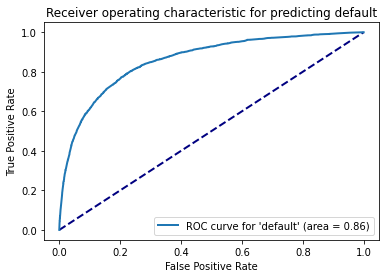

In [75]:
plt.figure()
lw =2 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for predicting default')
plt.plot(fpr, tpr,
        lw=lw, label='ROC curve for \'%s\' (area = %0.2f)' % ("default",roc_auc))
    
plt.legend(loc="lower right")

High AUC results of 0.86

### Precision and Recall AUC

In [76]:
from sklearn.metrics import precision_recall_curve

In [77]:
np.unique(y_test_numpy, return_counts = True)

(array([0, 1]), array([35025,  2475]))

In [78]:
precision, recall, _ = precision_recall_curve(y_test_numpy, y_pred_proba[:,1])

In [79]:
precision

array([0.066     , 0.06861874, 0.06868743, ..., 0.84210526, 0.82352941,
       1.        ])

In [80]:
pr_auc = auc(recall, precision)

In [81]:
pr_auc

0.385993074742961

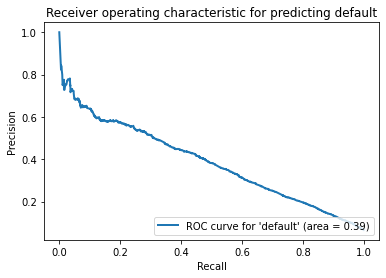

In [82]:
plt.figure()
lw =2 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Receiver operating characteristic for predicting default')
plt.plot(recall, precision,
        lw=lw, label='ROC curve for \'%s\' (area = %0.2f)' % ("default",pr_auc))
    
plt.legend(loc="lower right")

However for PR AUC , the AUC is lower, showing that the model is not as good as we thought for predicting default.

Hence, ROC AUC may be a good evaluation metrics for most problems especially when it has an equal class distribution. For this competition, due to the imbalanced class distribution, it would be good to base the evaluation on the model on other aspect, or perhaps fitting it more to what the end users of the model would want. As discussed in the previous section, I chose to focus on increasing Recall score as the loss from False Negatives ( people who are predicted as non defaulters but actually they defaulted ) far outweighs the gains from the interests earned by the bank when they give out loans.

# Q: Can you get into the top 100 of the private leaderboard, or even higher?

No. There is always room for improvement if i were to focus on getting the best ROC AUC score and some actions i would have taken includes, having a more extensive gridsearch, exploring other models.

# Try 2 
- Clustering to find a suitable value to fill in the na values 

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 92988 to 121958
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 1   age                                   112500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 3   DebtRatio                             112500 non-null  float64
 4   MonthlyIncome                         90223 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 6   NumberOfTimes90DaysLate               112500 non-null  int64  
 7   NumberRealEstateLoansOrLines          112500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 9   NumberOfDependents                    109562 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 9.4 MB


In [84]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [85]:
from sklearn.cluster import KMeans

In [86]:
# do a simple k means with k = 5
# given more time to explore, perhaps using elbow method to decide for best k can be carried out 

In [87]:
def get_median_cluster(cluster_lst, df, colname):
    """
    get the median given the colname of the dataframe for different cluster and return it in dictionary form
    
    Params:
    -------
    cluster_lst : list of integers
    df : pandas dataframe
    colname: string 
    
    Return:
    -------
    dictionary in the form of:
    e.g {
            <cluster_i> : <median_of_cluster_i>,
            .....
    }
    
    """
    dct = {}
    for cluster_i in cluster_lst:
        df_cluster_subset = df[df["cluster"] == cluster_i]
        cluster_median = df_cluster_subset[colname].median()
        dct[cluster_i] = cluster_median
    
    return dct
        

In [88]:
def clustering_median_method(X, columns_lst, k):
    """
    runs the whole method of getting the median for missing columns based on cluster's median
    
    Params:
    -------
    X: pandas dataframe
    columns_lst: list of colnames (string)
    k: number of clusters
    
    Returns
    -------
    pandas dataframe with na filled 
    """
    
    # step 1: Split the dataframe in those with na value and no na value 
    X_nona = X.dropna()
    X_na = X[~X.index.isin(list(X_nona.index))]
    
    # step 2: get columns to remain for clustering 
    clustering_columns = [col for col in list(X.columns) if col not in columns_lst]
    
    # Step 3: train clustering model 
    X_clustering = X_nona[clustering_columns]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_clustering)
    
    # step 4: get the cluster labels 
    X_nona["cluster"] = kmeans.labels_
    cluster_lst = list(np.unique(kmeans.labels_, return_counts = True)[0] )
    
    # step 5: get dictionary of cluster and the median for each column
    for column in columns_lst:
        median_cluster_dict = get_median_cluster(cluster_lst, X_nona, column)
        X_na_clustering = X_na[clustering_columns]
        cluster_labels = kmeans.predict(X_na_clustering)
        X_na["cluster"]= cluster_labels
        X_na[column] = X_na.apply(lambda x: median_cluster_dict[x["cluster"]], axis = 1)
    final_df = pd.concat([X_nona, X_na])
    return final_df
    
    
    

In [89]:
X_train_try2 = clustering_median_method(X_train, ["MonthlyIncome","NumberOfDependents"], 5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [90]:
X_train_try2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 92988 to 103694
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 1   age                                   112500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 3   DebtRatio                             112500 non-null  float64
 4   MonthlyIncome                         112500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 6   NumberOfTimes90DaysLate               112500 non-null  int64  
 7   NumberRealEstateLoansOrLines          112500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 9   NumberOfDependents                    112500 non-null  float64
 10  cluster                               112500 non-null  int32  
d

In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 59770 to 40589
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 1   age                                   37500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 3   DebtRatio                             37500 non-null  float64
 4   MonthlyIncome                         30046 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 6   NumberOfTimes90DaysLate               37500 non-null  int64  
 7   NumberRealEstateLoansOrLines          37500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 9   NumberOfDependents                    36514 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.1 MB


In [92]:
# do the same on testing set 
X_test_try2 = clustering_median_method(X_test, ["MonthlyIncome","NumberOfDependents"], 5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [93]:
X_test_try2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 59770 to 135907
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 1   age                                   37500 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 3   DebtRatio                             37500 non-null  float64
 4   MonthlyIncome                         37500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 6   NumberOfTimes90DaysLate               37500 non-null  int64  
 7   NumberRealEstateLoansOrLines          37500 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 9   NumberOfDependents                    37500 non-null  float64
 10  cluster                               37500 non-null  int32  
dtypes: float64

In [94]:
X_train_try2

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cluster
92988,0.182486,53,0,0.217973,8000.0,8,0,1,0,2.0,0
43658,0.000916,45,0,0.238913,28750.0,7,0,3,0,2.0,0
110698,0.149620,58,0,0.101878,9000.0,7,0,0,0,0.0,0
77130,1.000000,22,0,0.000000,929.0,1,0,0,0,0.0,0
109216,0.057441,33,0,0.428893,4000.0,6,0,1,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
123855,0.055973,37,0,2987.000000,0.0,9,0,1,0,1.0,1
84478,0.000000,74,0,0.000000,5410.0,1,0,0,0,0.0,0
126324,0.005531,45,0,3157.000000,0.0,6,0,1,0,1.0,1
54886,0.001243,66,0,396.000000,5410.0,4,0,0,0,0.0,0


In [95]:
X_train_try2_numpy = X_train_try2.to_numpy()
y_train_try2_numpy = y_train.loc[X_train_try2.index].to_numpy()

X_test_try2_numpy = X_test_try2.to_numpy()
y_test_try2_numpy = y_test.loc[X_test_try2.index].to_numpy()


## Modelling

### XGBoost

In [96]:
xgb_try2 = XGBClassifier(scale_pos_weight= scale_pos_weight) # using default params
xgb_try2.fit(X_train_try2_numpy, y_train_try2_numpy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=13.898688915375446,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [97]:
y_predict_try2 = xgb_try2.predict(X_test_try2_numpy)

In [98]:
confusion_matrix(y_test_try2_numpy,y_predict_try2)
# TN (0,0), FP(0,0)
# FN (1,0), TP (1,1)

array([[29284,  5741],
       [  734,  1741]])

In [99]:
print(classification_report(y_test_try2_numpy,y_predict_try2, target_names=target_names))

              precision    recall  f1-score   support

  no default       0.98      0.84      0.90     35025
     default       0.23      0.70      0.35      2475

    accuracy                           0.83     37500
   macro avg       0.60      0.77      0.63     37500
weighted avg       0.93      0.83      0.86     37500



pretty much similar to the one using median method